In [2]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

In [3]:
train = pd.read_csv('train.csv', parse_dates=['Dates'])
print(train.shape)

test = pd.read_csv('test.csv', parse_dates=['Dates'])
print(test.shape)

(867873, 10)
(10000, 9)


In [4]:
# Dates

train['Dates-year'] = train['Dates'].dt.year
train['Dates-month'] = train['Dates'].dt.month
train['Dates-day'] = train['Dates'].dt.day
train['Dates-hour'] = train['Dates'].dt.hour
train['Dates-minute'] = train['Dates'].dt.minute

test['Dates-year'] = test['Dates'].dt.year
test['Dates-month'] = test['Dates'].dt.month
test['Dates-day'] = test['Dates'].dt.day
test['Dates-hour'] = test['Dates'].dt.hour
test['Dates-minute'] = test['Dates'].dt.minute

In [5]:
train['Dates-minute_clean'] = train['Dates-minute']
train.loc[train['Dates-minute'] <= 30, 'Dates-minute_clean'] = 0
train.loc[train['Dates-minute'] > 30, 'Dates-minute_clean'] = 59

test['Dates-minute_clean'] = test['Dates-minute']
test.loc[train['Dates-minute'] <= 30, 'Dates-minute_clean'] = 0
test.loc[train['Dates-minute'] > 30, 'Dates-minute_clean'] = 59

In [6]:
print(train.columns)
print(train.shape)

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Id', 'Dates-year', 'Dates-month',
       'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-minute_clean'],
      dtype='object')
(867873, 16)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd540d9e630>,
      dtype=object)

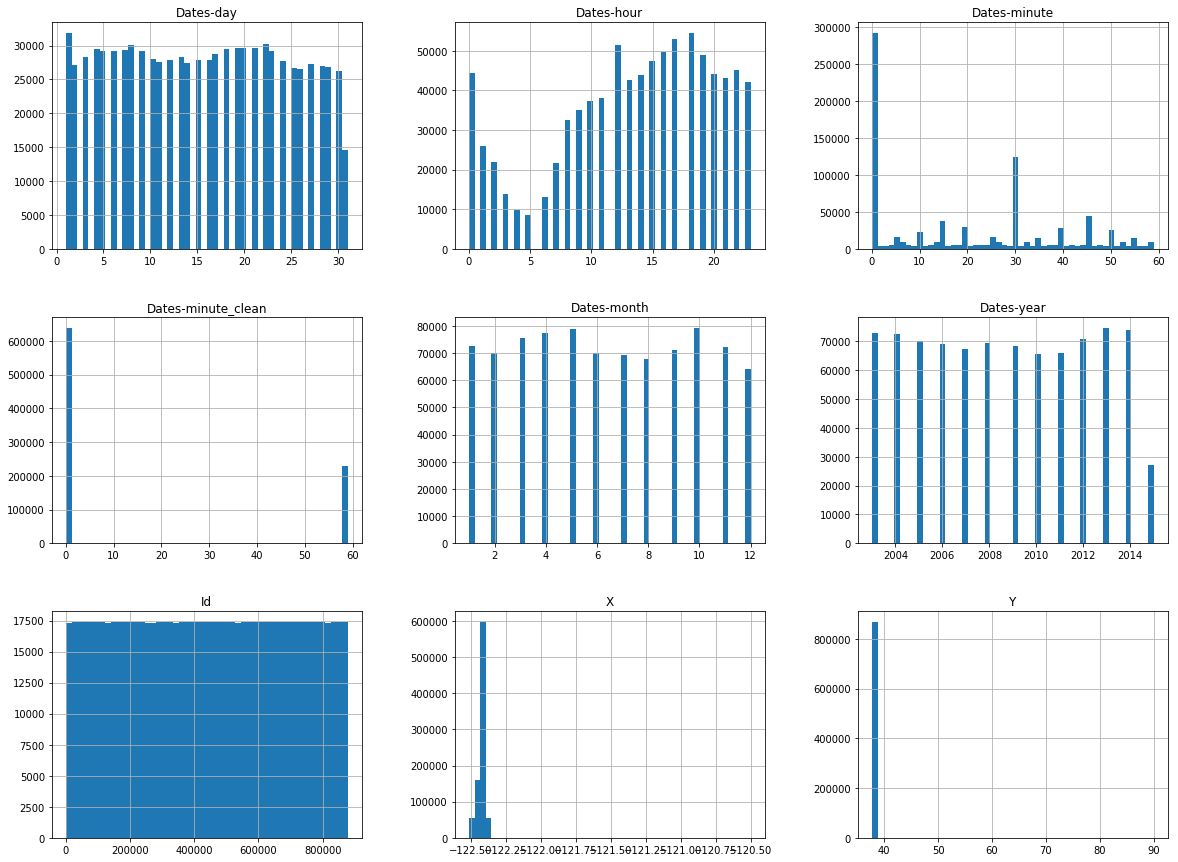

In [6]:
train.hist(bins=50, figsize=(20, 15))

Note the distribution of Dates-minute column

In [7]:
# PdDistrict

PdDistrict_dummies_train = pd.get_dummies(train['PdDistrict'], prefix='PdDistrict')

PdDistrict_dummies_test = pd.get_dummies(test['PdDistrict'], prefix='PdDistrict')

In [8]:
train = pd.concat([train, PdDistrict_dummies_train], axis=1)

PdDistrict_columns_list = list(PdDistrict_dummies_train.columns)

print(train.shape)

test = pd.concat([test, PdDistrict_dummies_test], axis=1)
print(test.shape)

(867873, 26)
(10000, 25)


In [9]:
# DayOfWeek

DayOfWeek_dummies_train = pd.get_dummies(train['DayOfWeek'], prefix='DayOfWeek')
print(DayOfWeek_dummies_train.shape)

DayOfWeek_dummies_test = pd.get_dummies(test['DayOfWeek'], prefix='DayOfWeek')
print(DayOfWeek_dummies_test.shape)

(867873, 7)
(10000, 7)


In [10]:
train = pd.concat([train, DayOfWeek_dummies_train], axis=1)
print(train.shape)

test = pd.concat([test, DayOfWeek_dummies_test], axis=1)
print(test.shape)

(867873, 33)
(10000, 32)


In [11]:
train['Address_CrossRoad'] = train['Address'].str.contains('/')
test['Address_CrossRoad'] = test['Address'].str.contains('/')

In [12]:
topN_address_list = train['Address'].value_counts()
topN_address_list = topN_address_list[topN_address_list >=100]
topN_address_list = topN_address_list.index
print(topN_address_list)

Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '900 Block of MARKET ST', '0 Block of TURK ST', '0 Block of 6TH ST',
       '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       '16TH ST / MISSION ST',
       ...
       '2300 Block of GOLDEN GATE AV', '0 Block of LOCKSLEY AV',
       '1100 Block of ELLIS ST', '900 Block of GRANT AV', 'CAPP ST / 19TH ST',
       '1800 Block of SUTTER ST', '0 Block of ZOO RD', '14TH ST / FOLSOM ST',
       '500 Block of JACKSON ST', 'MARKET ST / HYDE ST'],
      dtype='object', length=1616)


In [13]:
train['Address_clean'] = train['Address']
train.loc[~train['Address'].isin(topN_address_list), 'Address_clean'] = 'Others'

test['Address_clean'] = test['Address']
test.loc[~test['Address'].isin(topN_address_list), 'Address_clean'] = 'Others'

print(train.shape)
print(test.shape)

(867873, 35)
(10000, 34)


In [14]:
crossload = train[train['Address_clean'].str.contains('/')]
crossroad_list = crossload['Address_clean'].unique()
print(len(crossroad_list))

475


In [15]:
for address in crossroad_list:
    address_split = address.split('/')
    reverse_address = address_split[1].strip() + ' / ' + address_split[0].strip()
    
    train.loc[train['Address_clean'] == reverse_address, 'Address_clean'] = address
    test.loc[test['Address_clean'] == reverse_address, 'Address_clean'] = address

In [16]:
crossload = train[train['Address_clean'].str.contains('/')]
crossroad_list = crossload['Address_clean'].unique()
print(len(crossroad_list))

321


In [17]:
print(len(train[train['Address_clean'] == 'JONES ST / TURK ST']))
print(len(train[train['Address_clean'] == 'TURK ST / JONES ST']))


0
850


In [17]:
feature_names = ['X', 'Y','Address_CrossRoad']
feature_names = feature_names + ['Dates-minute_clean','Dates-hour']
feature_names = feature_names + PdDistrict_columns_list
label_name = 'Category'
X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)

(867873, 15)
(867873,)


In [18]:
X_test = test[feature_names]
print(X_test.shape)

(10000, 15)


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['Address_clean'])

train['Address_clean_encode'] = le.transform(train['Address_clean'])
test['Address_clean_encode'] = le.transform(test['Address_clean'])

print(train.shape)
print(test.shape)

(867873, 36)
(10000, 35)


In [66]:
print(feature_names)

['X', 'Y', 'Address_CrossRoad', 'Dates-minute_clean', 'Dates-hour', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']


In [20]:
feature_names += ['Address_clean_encode']
X_train = train[feature_names]
X_test = test[feature_names]

In [69]:
print(feature_names)

['X', 'Y', 'Address_CrossRoad', 'Dates-minute_clean', 'Dates-hour', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'Address_clean_encode']


In [70]:
print(X_train.shape)
print(X_test.shape)

(867873, 16)
(10000, 16)


In [22]:
columns = feature_names + [label_name]
print(columns)
print(len(columns))

['X', 'Y', 'Address_CrossRoad', 'Dates-minute_clean', 'Dates-hour', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'Address_clean_encode', 'Category']
17


In [23]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

seed = 3

model = xgb.XGBClassifier(objective='multi:softprob', seed=seed)

%time scores = cross_val_score(model, X_train, y_train, scoring='neg_log_loss', cv=5, n_jobs=-1)

print(scores)

KeyboardInterrupt: 

NameError: name 'scores' is not defined

In [27]:
print(-1*scores.mean())

2.4228112788778167


In [28]:
%time model.fit(X_train, y_train)

CPU times: user 20min 7s, sys: 424 ms, total: 20min 7s
Wall time: 20min 7s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=3, silent=True,
       subsample=1)

In [24]:
import pickle

In [40]:
pickle.dump(model, open("xgboost.p", "wb"))

In [25]:
model = pickle.load(open("xgboost.p", "rb"))

model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=3, silent=True,
       subsample=1)

In [26]:
predictions = model.predict_proba(X_test)

In [28]:
submission = pd.DataFrame(predictions)
print(submission)
submission.columns = sorted(train.Category.unique())
submission['Id'] = test['Id']

            0         1         2         3         4         5         6   \
0     0.001478  0.090830  0.000424  0.000475  0.027972  0.004513  0.003093   
1     0.001780  0.129737  0.000382  0.000429  0.032459  0.005402  0.004999   
2     0.000645  0.042698  0.000284  0.000257  0.001828  0.001903  0.002912   
3     0.001057  0.046294  0.000203  0.000264  0.002339  0.002419  0.003979   
4     0.000964  0.048791  0.000294  0.000313  0.002878  0.005907  0.001833   
5     0.000509  0.060836  0.000199  0.000298  0.001516  0.002057  0.001244   
6     0.001413  0.104464  0.000679  0.000517  0.031618  0.004594  0.001202   
7     0.001474  0.063220  0.000250  0.000459  0.002201  0.002744  0.004334   
8     0.001418  0.108709  0.000627  0.000519  0.027682  0.005149  0.001086   
9     0.002176  0.101176  0.000311  0.000355  0.099925  0.003036  0.007586   
10    0.001388  0.096279  0.001663  0.000415  0.079865  0.012557  0.000656   
11    0.002186  0.148382  0.000476  0.000895  0.033306  0.002910

In [79]:
submission.to_csv('trial.csv', index=False)